# Notebook per la conversione del datasample ICME_complete_dataset

In questo notebook facciamo uso delle librerie python 

pandas & astropy

per leggere una tabella in formato csv, importarla come un dataframe e salvarlo in csv, trasformare il dataframe in una Qtable di astropy e trasformare la Qtable in VOTable, salvare la VOTable in formato xml.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#from astropy.table import Table
from astropy.table import QTable
import astropy.units as u
import astropy.coordinates as astrocoord
import astropy.time as astrotime

from astropy.io import votable 
from astropy.io.votable import from_table, writeto, parse

Dopo aver importato tutte le librerie necessarie, leggiamo il file txt e creiamo la colonna standard del tempo.

In [2]:
directory='./'
file1='ICME_complete_dataset_v3.csv'

df1 = pd.read_csv(directory+file1, header=0)    #lettura del file. Indica esplicitamente che l'header è alla row 0

datestring=[]
datenew1=[]
datenew2=[]
datenew3=[]
Z=[]
i=0
for datet,date1,date2, date3 in zip(df1["LASCO_Date"],df1["LASCO_Start"],df1["Start_Date"],df1["Arrival_Date"]): 
    datestring.append(datet[:10]+'T'+datet[11:])
    datenew1.append(date1[:10]+'T'+date1[11:])
    datenew2.append(date2[:10]+'T'+date2[11:])
    datenew3.append(date3[:10]+'T'+date3[11:])
    #print(datenew1[i],datenew2[i],datenew3[i])
    i+=1

LON=[]
LAT=[]
    
for PHI,THETA in zip(df1["Phi_source"],df1["Theta_source"]): 
    LON.append(THETA)
    LAT.append(PHI)
    
    #print(datenew1[i],datenew2[i],datenew3[i])
    i+=1

t = astrotime.Time(datestring[1:], format='isot', scale='utc')
sun=astrocoord.get_sun(t)
Z=['AU']
for value in sun.distance.value:
    Z.append(value)
    
#datestring=df1['LASCO_Date']
df1.insert(0, 'Time', datestring) # inserire la colonna Time come prima colonna
df1.insert(1, 'HPC_Tx', LON) # inserire la colonna LON
df1.insert(2, 'HPC_Ty', LAT) # inserire la colonna LAT
df1.insert(3, 'HPC_distance', Z) # inserire la colonna Distance

df1["LASCO_Date"]=datestring
df1["LASCO_Start"]=datenew1
df1["Start_Date"]=datenew2
df1["Arrival_Date"]=datenew3

#df1.to_csv(directory+file_out, index=False)

In [3]:
df1

Time              HPC_Tx               HPC_Ty  \
0              datetimeT              arcsec               arcsec   
1    1997-01-06T15:10:42   25.21014298570143  -3.2217961203879613   
2    1997-02-07T00:30:05  53.055792710364486   -7.993756812159392   
3    1997-04-07T14:27:44  14.917489125543721   -25.97292385380731   
4    1997-05-12T05:30:05   6.568649217539123    21.39330033498325   
..                   ...                 ...                  ...   
209  2016-11-05T04:24:05  506.60281660694386    810.7339799255432   
210  2017-05-23T05:00:06  0.9282420582086273  -2.2681010905074688   
211  2017-09-04T20:36:05   6.363323332940102  -11.236878221638905   
212  2017-09-06T12:24:05  31.801840180219017   -3.314008565267614   
213  2018-03-06T01:25:41  -60.00186993766876  -11.346556781440619   

    HPC_distance CME_num              LASCO_Start               Start_Date  \
0             AU   index                datetimeT                datetimeT   
1       0.983319       1  1997-01-06T16:23:38.000  1997-01-07T08:35:05.600   
2         0.9863       2  1997-02-07T01:30:05.000  1997-02-07T07:35:12.440   
3       1.001209       3  1997-04-07T14:27:44.000  1997-04-07T17:26:59.000   
4       1.010308       4  1997-05-12T06:30:09.000  1997-05-12T09:00:08.640   
..           ...     ...                      ...                      ...   
209     0.991437     211  2016-11-05T04:24:05.000  2016-11-05T12:45:10.040   
210     1.012522     212  2017-05-23T05:00:06.000  2017-05-23T10:07:51.120   
211     1.008272     214  2017-09-04T20:36:05.000  2017-09-04T22:19:25.280   
212     1.007858     215  2017-09-06T12:24:05.000  2017-09-06T14:00:38.840   
213     0.991992     216  2018-03-06T01:25:41.000  2018-03-07T02:01:12.200   

            Arrival_Date PE_duration Arrival_v  ...             rel_wid  \
0              datetimeT       hours      km/s  ...                 rad   
1    1997-01-10T04:00:00        22.0       450  ...  0.5585053606381855   
2    1997-02-10T02:00:00        17.0       450  ...  0.7853981633974483   
3    1997-04-11T06:00:00        13.0       460  ...  1.1519173063162575   
4    1997-05-15T09:00:00        15.0       450  ...  0.7853981633974483   
..                   ...         ...       ...  ...                 ...   
209  2016-11-10T00:00:00        16.0       360  ...  0.2879793265790644   
210  2017-05-27T22:00:00        40.0       360  ...  0.7853981633974483   
211  2017-09-07T20:00:00         8.0       490  ...  1.1519173063162575   
212  2017-09-08T11:00:00        58.0       590  ...  1.1519173063162575   
213  2018-03-09T22:00:00        26.0       410  ...  0.5585053606381855   

                   Mass SW_type  Bz     DST            v_r_stat   Accel.  \
0                     g     NaN  nT      nT                km/s    m/s^2   
1     580000000000000.0       S  14   -78.0             181.172        0   
2    4100000000000000.0       S   8   -68.0              544.73   17.923   
3                 1e+16       S  20   -82.0   943.2059999999999   8.9076   
4    4200000000000000.0       S  21  -115.0             518.028        0   
..                  ...     ...  ..     ...                 ...      ...   
209   590000000000000.0       S  11   -59.0              400.95   10.303   
210             -9999.0       F  16  -122.0             307.493        0   
211             -9999.0       F  10   -17.0  1497.7859999999998        0   
212             -9999.0       S   7  -124.0            1654.917  -2.3911   
213             -9999.0       S  14   -39.0             171.929        0   

    Analyitic_w Analyitic_gamma                filename  
0          km/s           km^-1                     NaN  
1             0               0    CME_01_param_inv.txt  
2             0               0    CME_02_param_inv.txt  
3             0               0    CME_03_param_inv.txt  
4        395.56      6.0698e-08    CME_04_param_inv.txt  
..          ...             ...                     ...  
209           0               0  C

Adesso creiamo le righe con la tipologia di dataentry e le units per ogni colonna.
Piccolo trucco per inserirle alla fine, e poi shiftare l'indice per avere gli header nelle prime tre righe 

In [4]:
head1=df1.columns 
head_quantity=df1.loc[0]
head_quantity[0]="UTC" 
head_quantity[1]="arcsec" 
head_quantity[2]="arcsec" 
head_quantity[3]="AU" 


head_quantity[2+3]="UTC" 
head_quantity[3+3]="UTC" 
head_quantity[4+3]="UTC" 
head_quantity[9+3]="UTC" 

head_quantity[13+3]="char" 
head_quantity[22+3]="char"  
head_quantity[29+3]="char" 

head_type=["datetime","float","float","float","int","datetime","datetime","datetime","int","int","float","float","datetime","int","int","int","char","float","float","float","float","float","float","float","int","char","int","int","float","float","float","float","char"]
null_type=["-",np.nan,np.nan,np.nan,"-9999","-","-","-",-9999,-9999,np.nan,np.nan,'-',-9999,-9999,-9999,'-',np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,-9999,'-',-9999,-9999,np.nan,np.nan,np.nan,np.nan,'-']

df1.loc[-1] = head_quantity  # adding the headers at the end 
df1.loc[-2] = null_type  # adding 
df1.loc[-3] = head_type  # adding 
  
df1.drop([0],inplace=True)
df1.index=df1.index +3
df = df1.sort_index()
df

Time              HPC_Tx               HPC_Ty  \
0               datetime               float                float   
1                      -                 NaN                  NaN   
2                    UTC              arcsec               arcsec   
4    1997-01-06T15:10:42   25.21014298570143  -3.2217961203879613   
5    1997-02-07T00:30:05  53.055792710364486   -7.993756812159392   
..                   ...                 ...                  ...   
212  2016-11-05T04:24:05  506.60281660694386    810.7339799255432   
213  2017-05-23T05:00:06  0.9282420582086273  -2.2681010905074688   
214  2017-09-04T20:36:05   6.363323332940102  -11.236878221638905   
215  2017-09-06T12:24:05  31.801840180219017   -3.314008565267614   
216  2018-03-06T01:25:41  -60.00186993766876  -11.346556781440619   

    HPC_distance CME_num              LASCO_Start               Start_Date  \
0          float     int                 datetime                 datetime   
1            NaN   -9999                        -                        -   
2             AU   index                      UTC                      UTC   
4       0.983319       1  1997-01-06T16:23:38.000  1997-01-07T08:35:05.600   
5         0.9863       2  1997-02-07T01:30:05.000  1997-02-07T07:35:12.440   
..           ...     ...                      ...                      ...   
212     0.991437     211  2016-11-05T04:24:05.000  2016-11-05T12:45:10.040   
213     1.012522     212  2017-05-23T05:00:06.000  2017-05-23T10:07:51.120   
214     1.008272     214  2017-09-04T20:36:05.000  2017-09-04T22:19:25.280   
215     1.007858     215  2017-09-06T12:24:05.000  2017-09-06T14:00:38.840   
216     0.991992     216  2018-03-06T01:25:41.000  2018-03-07T02:01:12.200   

            Arrival_Date PE_duration Arrival_v  ...             rel_wid  \
0               datetime         int       int  ...               float   
1                      -       -9999     -9999  ...                 NaN   
2                    UTC       hours      km/s  ...                 rad   
4    1997-01-10T04:00:00        22.0       450  ...  0.5585053606381855   
5    1997-02-10T02:00:00        17.0       450  ...  0.7853981633974483   
..                   ...         ...       ...  ...                 ...   
212  2016-11-10T00:00:00        16.0       360  ...  0.2879793265790644   
213  2017-05-27T22:00:00        40.0       360  ...  0.7853981633974483   
214  2017-09-07T20:00:00         8.0       490  ...  1.1519173063162575   
215  2017-09-08T11:00:00        58.0       590  ...  1.1519173063162575   
216  2018-03-09T22:00:00        26.0       410  ...  0.5585053606381855   

                   Mass SW_type     Bz     DST            v_r_stat   Accel.  \
0                   int    char    int     int               float    float   
1                 -9999       -  -9999   -9999                 NaN      NaN   
2                     g    char     nT      nT                km/s    m/s^2   
4     580000000000000.0       S     14   -78.0             181.172        0   
5    4100000000000000.0       S      8   -68.0              544.73   17.923   
..                  ...     ...    ...     ...                 ...      ...   
212   590000000000000.0       S     11   -59.0              400.95   10.303   
213             -9999.0       F     16  -122.0             307.493        0   
214             -9999.0       F     10   -17.0  1497.7859999999998        0   
215             -9999.0       S      7  -124.0            1654.917  -2.3911   
216             -9999.0       S     14   -39.0             171.929        0   

    Analyitic_w Analyitic_gamma                filename  
0         float           float                    char  
1           NaN             NaN                       -  
2          km/s           km^-1                    char  
4             0               0    CME_01_param_inv.txt  
5             0               0    CME_02_param_inv.txt  
..          ...             ...                     ... 

Definizione nome output e
Scrittura del file in formato csv

In [5]:
file_out='ICME_complete_dataset_v3_edit.csv'
df.to_csv(directory+file_out, index=False)

Per verificare che la scrittura sia andata a buon fine, re-importiamo il dataframe

In [6]:
df_check = pd.read_csv(directory+file_out)
df_check

Time              HPC_Tx               HPC_Ty  \
0               datetime               float                float   
1                      -                 NaN                  NaN   
2                    UTC              arcsec               arcsec   
3    1997-01-06T15:10:42   25.21014298570143  -3.2217961203879613   
4    1997-02-07T00:30:05  53.055792710364486   -7.993756812159392   
..                   ...                 ...                  ...   
211  2016-11-05T04:24:05  506.60281660694386    810.7339799255432   
212  2017-05-23T05:00:06  0.9282420582086273  -2.2681010905074688   
213  2017-09-04T20:36:05   6.363323332940102  -11.236878221638905   
214  2017-09-06T12:24:05  31.801840180219017   -3.314008565267614   
215  2018-03-06T01:25:41  -60.00186993766876  -11.346556781440619   

           HPC_distance CME_num              LASCO_Start  \
0                 float     int                 datetime   
1                   NaN   -9999                        -   
2                    AU   index                      UTC   
3    0.9833190616721483       1  1997-01-06T16:23:38.000   
4    0.9863004902564392       2  1997-02-07T01:30:05.000   
..                  ...     ...                      ...   
211  0.9914371977850864     211  2016-11-05T04:24:05.000   
212   1.012522235122406     212  2017-05-23T05:00:06.000   
213  1.0082716307919628     214  2017-09-04T20:36:05.000   
214  1.0078575190962793     215  2017-09-06T12:24:05.000   
215  0.9919915024070094     216  2018-03-06T01:25:41.000   

                  Start_Date         Arrival_Date PE_duration Arrival_v  ...  \
0                   datetime             datetime         int       int  ...   
1                          -                    -       -9999     -9999  ...   
2                        UTC                  UTC       hours      km/s  ...   
3    1997-01-07T08:35:05.600  1997-01-10T04:00:00        22.0       450  ...   
4    1997-02-07T07:35:12.440  1997-02-10T02:00:00        17.0       450  ...   
..                       ...                  ...         ...       ...  ...   
211  2016-11-05T12:45:10.040  2016-11-10T00:00:00        16.0       360  ...   
212  2017-05-23T10:07:51.120  2017-05-27T22:00:00        40.0       360  ...   
213  2017-09-04T22:19:25.280  2017-09-07T20:00:00         8.0       490  ...   
214  2017-09-06T14:00:38.840  2017-09-08T11:00:00        58.0       590  ...   
215  2018-03-07T02:01:12.200  2018-03-09T22:00:00        26.0       410  ...   

                rel_wid                Mass SW_type     Bz     DST  \
0                 float                 int    char    int     int   
1                   NaN               -9999       -  -9999   -9999   
2                   rad                   g    char     nT      nT   
3    0.5585053606381855   580000000000000.0       S     14   -78.0   
4    0.7853981633974483  4100000000000000.0       S      8   -68.0   
..                  ...                 ...     ...    ...     ...   
211  0.2879793265790644   590000000000000.0       S     11   -59.0   
212  0.7853981633974483             -9999.0       F     16  -122.0   
213  1.1519173063162575             -9999.0       F     10   -17.0   
214  1.1519173063162575             -9999.0       S      7  -124.0   
215  0.5585053606381855             -9999.0       S     14   -39.0   

               v_r_stat   Accel. Analyitic_w Analyitic_gamma  \
0                 float    float       float           float   
1                   NaN      NaN         NaN             NaN   
2                  km/s    m/s^2        km/s           km^-1   
3               181.172        0           0               0   
4                544.73   17.923           0               0   
..                  ...      ...         ...             ...   
211              400.95   10.303           0               0   
212             307.493        0           0               0   
213  1497.7859999999998        0      477.57      3.1769e-07   
214            1654.917  -2.

Prepariamo i dati per l'inserimento in una Qtable di astropy.

Forziamo il type sulle colonne (adesso sono tutte delle stringhe)


In [7]:
df_new=df_check.drop([0,2])

df_new['HPC_Tx'] = df_new['HPC_Tx'].astype(float)
df_new['HPC_Ty'] = df_new['HPC_Ty'].astype(float)
df_new['HPC_distance'] = df_new['HPC_distance'].astype(float)
df_new['CME_num'] = df_new['CME_num'].astype(int)
df_new['PE_duration'] = df_new['PE_duration'].astype(float)
df_new['Arrival_v'] = df_new['Arrival_v'].astype(int)
df_new['Transit_time'] = df_new['Transit_time'].astype(float)
df_new['Transit_time_err'] = df_new['Transit_time_err'].astype(float)
df_new['LASCO_v'] = df_new['LASCO_v'].astype(float)
df_new['LASCO_pa'] = df_new['LASCO_pa'].astype(float)
df_new['LASCO_da'] = df_new['LASCO_da'].astype(float)
df_new['v_r'] = df_new['v_r'].astype(float)
df_new['v_r_err'] = df_new['v_r_err'].astype(float)
df_new['Theta_source'] = df_new['Theta_source'].astype(float)
df_new['Phi_source'] = df_new['Phi_source'].astype(float)
df_new['source_err'] = df_new['source_err'].astype(float)
df_new['POS_source_angle'] = df_new['POS_source_angle'].astype(float)
df_new['rel_wid'] = df_new['rel_wid'].astype(float)
df_new['Mass'] = df_new['Mass'].astype(float)
df_new['Bz'] = df_new['Bz'].astype(float)
df_new['DST'] = df_new['DST'].astype(float)
df_new['v_r_stat'] = df_new['v_r_stat'].astype(float)
df_new['Accel.'] = df_new['Accel.'].astype(float)
df_new['Analyitic_w'] = df_new['Analyitic_w'].astype(float)
df_new['Analyitic_gamma'] = df_new['Analyitic_gamma'].astype(float)

#ype(df_new['Analyitic_gamma'])


Inseriamo i dati in una Qtable di astropy.

E dopo possiamo associare le units alle colonne che lo necessitano

In [8]:
# https://docs.astropy.org/en/stable/table/pandas.html
ATable= QTable.from_pandas(df_new)

ATable['HPC_Tx'] = ATable['HPC_Tx']*u.arcsec
ATable['HPC_Ty'] = ATable['HPC_Ty']*u.arcsec
ATable['HPC_distance'] = ATable['HPC_distance']*u.astrophys.AU
ATable['PE_duration'] = ATable['PE_duration']*u.hour
ATable['Arrival_v'] = ATable['Arrival_v']*u.km/u.s
ATable['Transit_time'] = ATable['Transit_time']*u.hour
ATable['Transit_time_err'] = ATable['Transit_time_err']*u.hour
ATable['LASCO_v'] = ATable['LASCO_v']*u.km/u.s
ATable['LASCO_pa'] = ATable['LASCO_pa']*u.deg
ATable['LASCO_da'] = ATable['LASCO_da']*u.deg
ATable['v_r'] = ATable['v_r']*u.km/u.s
ATable['v_r_err'] = ATable['v_r_err']*u.km/u.s
ATable['Theta_source'] = ATable['Theta_source']*u.arcsec
ATable['Phi_source'] = ATable['Phi_source']*u.arcsec
ATable['source_err'] = ATable['source_err']*u.arcsec
ATable['POS_source_angle'] = ATable['POS_source_angle']*u.deg
ATable['rel_wid'] = ATable['rel_wid']*u.rad
ATable['Mass'] = ATable['Mass']*u.g
ATable['Bz'] = ATable['Bz']*u.nT
ATable['DST'] = ATable['DST']*u.nT
ATable['v_r_stat'] = ATable['v_r_stat']*u.km/u.s
ATable['Accel.'] = ATable['Accel.']*u.m/u.s/u.s
ATable['Analyitic_w'] = ATable['Analyitic_w']*u.km/u.s
ATable['Analyitic_gamma'] = ATable['Analyitic_gamma']/u.km

ATable

<QTable length=214>
        Time               HPC_Tx              HPC_Ty          HPC_distance    CME_num ...  Accel. Analyitic_w Analyitic_gamma        filename       
                           arcsec              arcsec               AU                 ...  m / s2    km / s        1 / km                           
       str19              float64             float64            float64        int64  ... float64   float64       float64             str22         
------------------- ------------------- ------------------- ------------------ ------- ... ------- ----------- --------------- ----------------------
                  -                 nan                 nan                nan   -9999 ...     nan         nan             nan                      -
1997-01-06T15:10:42   25.21014298570143 -3.2217961203879613 0.9833190616721483       1 ...     0.0         0.0             0.0   CME_01_param_inv.txt
1997-02-07T00:30:05  53.055792710364486  -7.993756812159392 0.9863004902564392       2 ...  17.923         0.0             0.0   CME_02_param_inv.txt
1997-04-07T14:27:44  14.917489125543721  -25.97292385380731 1.0012093956886126       3 ...  8.9076         0.0             0.0   CME_03_param_inv.txt
1997-05-12T05:30:05   6.568649217539123   21.39330033498325 1.0103083853949135       4 ...     0.0      395.56      6.0698e-08   CME_04_param_inv.txt
1997-05-21T21:00:53 -63.993600639936005  -35.99640035996401 1.0122788685632198       5 ...  2.5211         0.0             0.0   CME_05_param_inv.txt
                ...                 ...                 ...                ...     ... ...     ...         ...             ...                    ...
2016-07-17T10:48:05  -24.24193940447004    -13.362226767245 1.0163043803021892     209 ...  4.6344         0.0             0.0 CME_0209_param_inv.txt
2016-07-28T22:24:05  -35.77000399960004  -16.70986601339866  1.015344577876874     210 ...  10.791         0.0             0.0 CME_0210_param_inv.txt
2016-11-05T04:24:05  506.60281660694386   810.7339799255432 0.9914371977850864     211 ...  10.303         0.0             0.0 CME_0211_param_inv.txt
2017-05-23T05:00:06  0.9282420582086273 -2.2681010905074688  1.012522235122406     212 ...     0.0         0.0             0.0 CME_0212_param_inv.txt
2017-09-04T20:36:05   6.363323332940102 -11.236878221638905 1.0082716307919628     214 ...     0.0      477.57      3.1769e-07 CME_0214_param_inv.txt
2017-09-06T12:24:05  31.801840180219017  -3.314008565267614 1.0078575190962793     215 ... -2.3911      420.03      3.1995e-08 CME_0215_param_inv.txt
2018-03-06T01:25:41  -60.00186993766876 -11.346556781440619 0.9919915024070094     216 ...     0.0         0.0             0.0 CME_0216_param_inv.txt

Trasformiamo la astropy Qtable in una VOTable e la scriviamo su file

In [9]:
#https://docs.astropy.org/en/stable/io/votable/index.html
votable = from_table(ATable)
file_out2='ICME_complete_dataset_v3_edit.xml'
writeto(votable, file_out2)


Per verificare che la scrittura sia andata a buon fine, re-importiamo la VOTable

<Figure size 360x360 with 0 Axes>

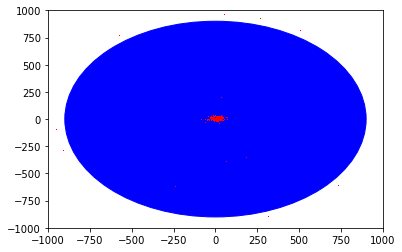

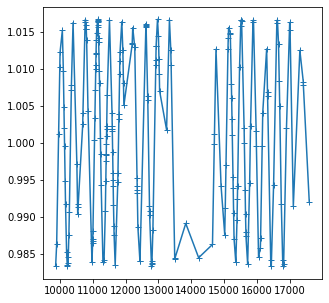

In [10]:
import astropy 

votable = parse(file_out2)
intable = votable.get_first_table()
x=intable.array["HPC_Tx"]
y=intable.array["HPC_Ty"]

circle=plt.Circle((0, 0), 900, color='blue')
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

ax.add_patch(circle)
plt.plot(x,y,',r')
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.show()

times=intable.array["Time"]
t = astropy.time.Time(times[1:], format='isot', scale='utc')
D=intable.array["HPC_distance"]
D=D[1:]

plt.figure(figsize=(5,5))
plt.plot(t.plot_date,D,'+-')
plt.show()

In [24]:
V=ATable['source_err'][3:]

In [28]:
V[60:69]

<Quantity [20.        , 20.        ,         inf, 20.        , 21.10409065,
           20.        , 20.        , 20.        , 20.        ] arcsec>